In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility.graphing_tools import single_dim_comparison, generate_latex_table_from_csvs, method_name_coverter, heavy_t_comparison

# Testing Coverage on Six Distributions

We test all methods discussed in the experiment section of our paper on four different distributions: Gaussian, Gaussian with unit noise, Laplace, Gamma, Mixed, Cauchy.
We report test coverage, volume, and runtime with their one standard deviation. 

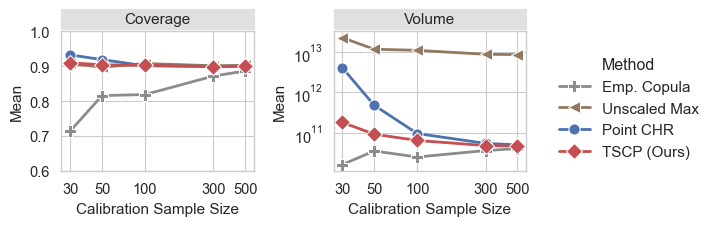

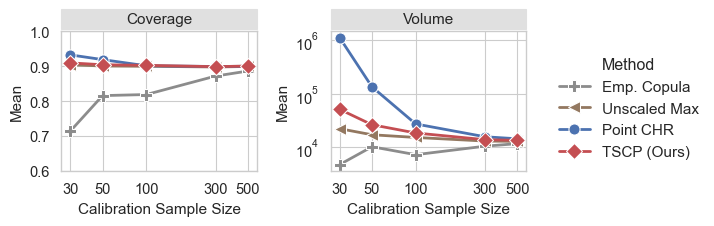

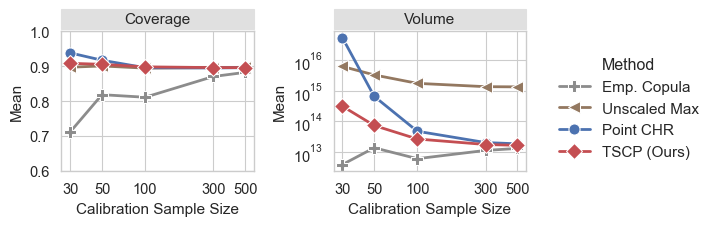

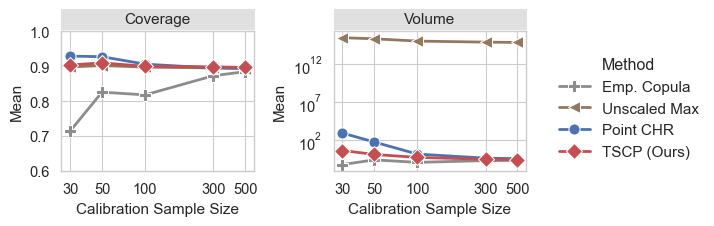

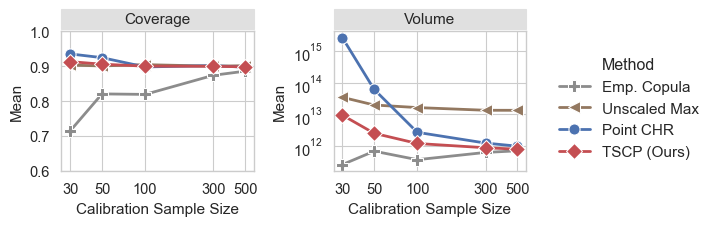

In [95]:
dim_list = [10]
sample_list = [30, 50, 100, 300, 500]
alpha_list = [0.1]
trial = 200
noise_list_unit = [np.repeat(1, 2), np.repeat(1, 10)]
noise_type_list = ["Gaussian", "Unit_Gaussian", "Laplace", "Gamma", "Mixed"]
method_list_baselines = ["Point_CHR", "Unscaled", "Empirical_copula", "TSCP_R"]
method_name_list_baselines = method_name_coverter(method_list=method_list_baselines)

for noise_type in noise_type_list:

    folder_name = "gaussian" if noise_type == "Unit_Gaussian" else noise_type.lower()
    dict1 = {}
    for method in method_list_baselines:
        results = pd.read_csv("syn_exps/"+folder_name+"/"+method.lower()+"_"+noise_type.lower()+".csv")
        dict1[method_name_list_baselines[method]] = results
    for dim in dim_list:
        fig, axes = single_dim_comparison(df_dict=dict1, dim = 10, include_runtime=False, include_legend=True, legend_bbox=(0.85, 0.5), figsize=(6.5,2.5), ncols=1)
        fig.savefig(f"syn_exps/figures/baselines/{noise_type.lower()}_{dim}d.pdf", bbox_inches='tight')
        generate_latex_table_from_csvs(dict1, dim, noise_type, filename=f"syn_exps/figures/baselines/{noise_type.lower()}_{dim}d.tex")


# Testing Our Method on t-distribution

We test our method on the student t distribution with fixed dim and fixed sample but various degree of freedome to see how robust our method is with heavy tailed error.

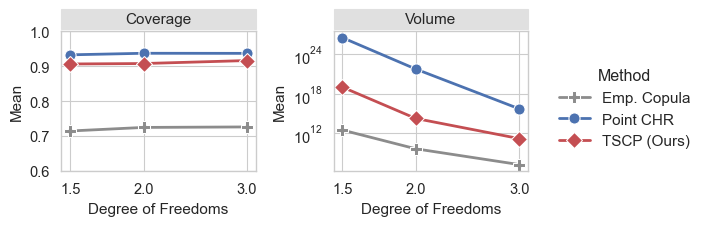

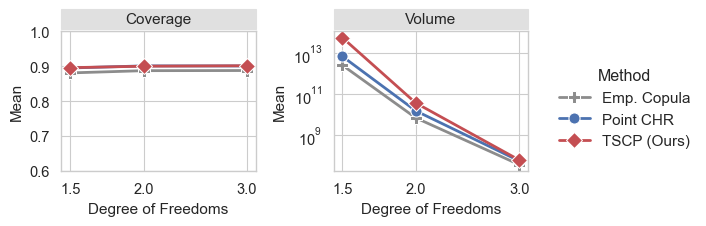

In [96]:
dim_list_t = [10]
df_list = [1.5, 2, 3, 10, 30]
sample_list_t = [30, 500]
method_list_t = ["Point_CHR", "TSCP_R", "Empirical_copula"]
method_name_list_t = method_name_coverter(method_list=method_list_t)

dict_t = {}
for method in method_list_t:
    results = pd.read_csv("syn_exps/t/"+method.lower()+"_t.csv")
    dict_t[method_name_list_t[method]] = results

for dim in dim_list_t:
    for sample in sample_list_t:
        fig, axes = heavy_t_comparison(df_dict=dict_t, dim=dim, sample = sample, ncols = 1, legend_bbox=(0.85, 0.5), figsize=(6.5,2.5), include_runtime=False)
        fig.savefig(f"syn_exps/figures/t/t_n{sample}_{dim}d.pdf", bbox_inches='tight')
        generate_latex_table_from_csvs(dict_t, dim, "Student-t", filename=f"syn_exps/figures/t/t_n{sample}_{dim}d.tex")

# Comparison of Our Methods on 2D-Laplace

We compare all four variants of our method, including the population oracle on 2D Laplace noise. We only do it for 2D because the TSCP-LWC method is almost impossible to finish with large dimensions, but the message overall should be clear.

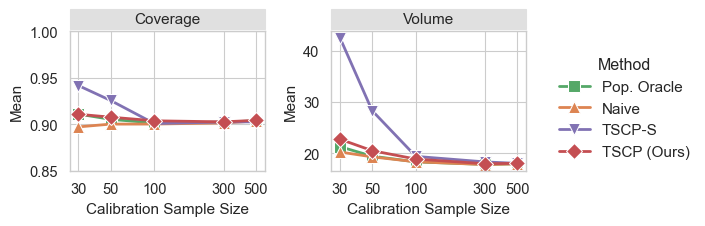

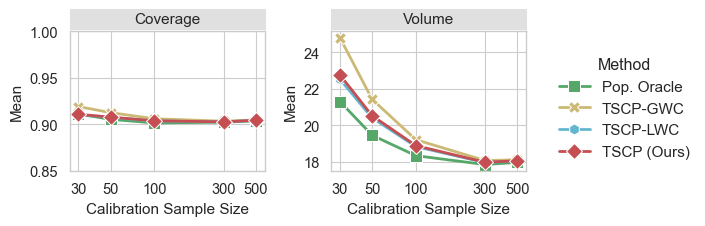

In [97]:
method_list_ours1 = ["TSCP_R", "TSCP_S", "Population_oracle", "Naive"]
method_name_list_ours1 = method_name_coverter(method_list_ours1)

method_list_ours2 = ["TSCP_R", "TSCP_GWC", "TSCP_LWC", "Population_oracle"]
method_name_list_ours2 = method_name_coverter(method_list_ours2)

dict_ours1 = {}
for method in method_list_ours1:
    results = pd.read_csv("syn_exps/laplace/"+method.lower()+"_laplace.csv")
    dict_ours1[method_name_list_ours1[method]] = results
fig, axes = single_dim_comparison(df_dict=dict_ours1, dim = 2, include_runtime=False, include_legend=True, legend_bbox=(0.85, 0.5), figsize=(6.5,2.5), ncols=1, ylim = (0.85, 1))
fig.savefig("syn_exps/figures/ours/ours_approximation_2d.pdf", bbox_inches='tight')

dict_ours2 = {}
for method in method_list_ours2:
    results = pd.read_csv("syn_exps/laplace/"+method.lower()+"_laplace.csv")
    dict_ours2[method_name_list_ours2[method]] = results
fig, axes = single_dim_comparison(df_dict=dict_ours2, dim = 2, include_runtime=False, include_legend=True, legend_bbox=(0.85, 0.5), figsize=(6.5,2.5), ncols=1, ylim = (0.85, 1))
fig.savefig("syn_exps/figures/ours/ours_containment_2d.pdf", bbox_inches='tight')

dict_ours = dict_ours1|dict_ours2
generate_latex_table_from_csvs(dict_ours, dim = 2, noise_type="Laplace", filename="syn_exps/figures/ours/ours_comparisons_2d.tex")

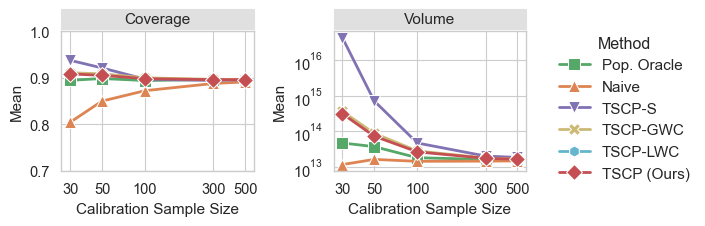

In [98]:
method_list_ours3 = ["TSCP_R", "TSCP_GWC", "TSCP_LWC", "TSCP_S", "Population_oracle", "Naive"]
method_name_list_ours3 = method_name_coverter(method_list_ours3)

dict_ours3 = {}
for method in method_list_ours3:
    results = pd.read_csv("syn_exps/laplace/"+method.lower()+"_laplace.csv")
    dict_ours3[method_name_list_ours3[method]] = results
fig, axes = single_dim_comparison(df_dict=dict_ours3, dim = 10, include_runtime=False, include_legend=True, legend_bbox=(0.85, 0.5), figsize=(6.5,2.5), ncols=1, ylim = (0.7, 1))
fig.savefig("syn_exps/figures/ours/ours_containment_10d.pdf", bbox_inches='tight')

# Runtime Comparison on 2D Laplace

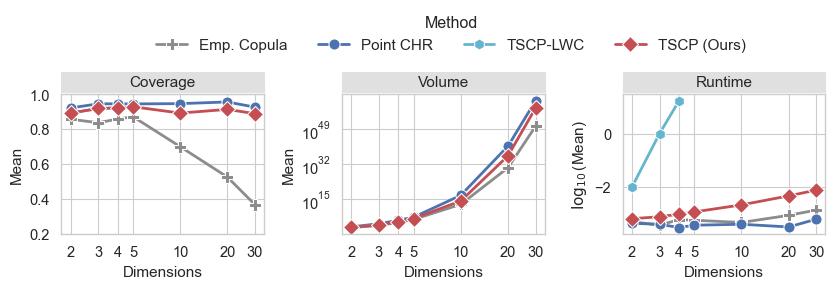

In [99]:
method_list_runtime = ["TSCP_LWC", "TSCP_R", "Point_CHR", "Empirical_copula"]
method_name_list_runtime = method_name_coverter(method_list_runtime)
dict1 = {}
for method in method_list_runtime:
    results = pd.read_csv(f"syn_exps/laplace/{method.lower()}_laplace_30sample.csv")
    dict1[method_name_list_runtime[method]] = results
fig, ax = compare_across_dims(df_dict=dict1, ncols=5, legend_bbox=(0.15, 1.05), figsize=(10, 2.5), ylim=(0.20, 1))
fig.savefig("syn_exps/figures/ours/ours_runtime.pdf", bbox_inches='tight')

In [100]:
# Import general packages
import hashlib
import numpy as np
import pandas as pd
import time
from typing import List, Optional

# Import training packages
from sklearn.linear_model import LinearRegression, MultiTaskLasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Dataset loader
from ucimlrepo import fetch_ucirepo 
from scipy.io import arff

# Import utility packages
from utility.data_generator import make_multitarget_regression
from utility.res_rescaled import check_coverage_rate, standardized_prediction
from utility.unscaled import unscaled_prediction, bonferroni_prediction
from utility.data_splitting import data_splitting_standardized_prediction, data_spliting_CHR_prediction, data_splitting_oracle_prediction, naive_prediction
from utility.copula import empirical_copula_prediction


ModuleNotFoundError: No module named 'ucimlrepo'

In [ ]:
def stable_hash(*args):
    """
    Create a reproducible hash from input arguments, useful for random seeds.

    Parameters
    ----------
    *args : Any
        Sequence of inputs to be hashed.

    Returns
    -------
    int
        A deterministic hash value based on inputs.
    """
    key = "_".join(str(a) for a in args)
    return int(hashlib.sha256(key.encode()).hexdigest(), 16) % (2**32)

def function_choice(scores, alpha, method, mu = None, std = None):
    """
    Select and run the prediction region method based on input string.

    Parameters
    ----------
    scores : np.ndarray
        Score values used to construct prediction regions.
    alpha : float
        Miscoverage level.
    method : str
        The method name specifying which region construction to use.

    Returns
    -------
    depends on method
        Either a single region (Rectangle) or list of regions.
    """

    # Scaled methods
    #if method == "Scaled (Full)":
    #    return scaled_prediction(scores=scores, alpha=alpha, short_cut=False)
    #elif method == "Scaled (Shortcut)":
    #    return scaled_prediction(scores=scores, alpha=alpha, short_cut=True)
    #elif method == "Scaled (Data Splitting)":
    #    return data_splitting_scaled_prediction(scores=scores, alpha=alpha)

    # Standardized methods
    if method == "TSCP_LWC":
        return standardized_prediction(scores=scores, alpha=alpha, short_cut=False)
    elif method == "TSCP_R":
        return standardized_prediction(scores=scores, alpha=alpha, short_cut=True)
    elif method == "TSCP_GWC":
        return standardized_prediction(scores=scores, alpha=alpha, method= "GWC", short_cut=True)
    elif method == "TSCP_S":
        return data_splitting_standardized_prediction(scores=scores, alpha=alpha)
    elif method == "Population_oracle":
        return data_splitting_oracle_prediction(scores = scores, mu = mu, std = std, alpha=alpha)
    elif method == "Naive":
        return naive_prediction(scores=scores, alpha=alpha)
    
    # Point CHR
    elif method == "Point_CHR":
        return data_spliting_CHR_prediction(scores=scores, alpha=alpha)
    
    # Empirical copuls
    elif method == "Empirical_copula":
        return empirical_copula_prediction(scores=scores, alpha=alpha)

    # No scaling methods
    elif method == "Unscaled":
        return unscaled_prediction(scores=scores, alpha=alpha)
    elif method == "Bonferroni":
        return bonferroni_prediction(scores=scores, alpha=alpha)

def run_energy_toy(num_splits, alpha = 0.1, cal_size = 0.2, test_size = 0.2, case = 1):

    methods = [
            "Unscaled",
            "TSCP_R", 
            "Point_CHR", 
            "Empirical_copula" 
            ]

    # Load data
    energy_efficiency = fetch_ucirepo(id=242) 
        
    X = energy_efficiency.data.features
    y = energy_efficiency.data.targets
    model= RandomForestRegressor(
                n_estimators=200,          
                max_depth=None,            
                min_samples_split=2,       
                min_samples_leaf=1,        
                max_features=1.0,          # Use all features at each split
                bootstrap=True,            
                random_state=77,
                n_jobs=-1
            )


    for i in range(num_splits):

        X_train, X_cal_test, y_train, y_cal_test = train_test_split(X, y, test_size=test_size+cal_size, random_state=stable_hash(i))
        X_cal, X_test, y_cal, y_test = train_test_split(X_cal_test, y_cal_test, test_size=test_size/(cal_size+test_size), random_state=stable_hash(i))

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        prediction_cal = model.predict(X_cal)
        scores_cal = np.asarray(np.abs(prediction_cal-y_cal), dtype=np.float64)
        y_test = y_test.reset_index(drop=True)
        pred_test = model.predict(X_test)
        scores_test = np.abs(pred_test - y_test)

        # Run the methods
        predictions = {}
        for index, method in enumerate(methods): 
            prediction = function_choice(scores_cal, alpha, method) 
            predictions[method] = prediction
        

        condition_a = predictions["TSCP_R"].volume() < predictions["Point_CHR"].volume()
        condition_b = predictions["Point_CHR"].volume() < predictions["Unscaled"].volume()


        if condition_a and condition_b:
            for index, row in y_test.reset_index(drop=True).iterrows(): 
                y0 = model.predict(X_test)[index] 
                sample = np.asarray(np.abs(y0-row))

                if case == 1:
                    if (predictions["TSCP_R"].contains(sample)) and predictions["Unscaled"].contains(sample) and not predictions["Empirical_copula"].contains(sample):

                        temp = {}
                        for m in methods:

                            upper = predictions[m].upper

                            temp[m] = {
                                "Outcomes 1": (f"{y0[0]-upper[0]:.3f}", f"{y0[0]+upper[0]:.3f}"),
                                "Outcomes 2": (f"{y0[1]-upper[1]:.3f}", f"{y0[1]+upper[1]:.3f}"),
                                "Volume": f"{predictions[m].volume():.3f}"
                            }
                            

                        temp["Ground Truth"] = row.values 
                        
                        return temp
                    
                
                else: 
                    if predictions["TSCP_R"].contains(sample):
                        
                        temp = {}
                        for m in methods:

                            upper = predictions[m].upper

                            temp[m] = {
                                "Outcomes 1": (f"{y0[0]-upper[0]:.3f}", f"{y0[0]+upper[0]:.3f}"),
                                "Outcomes 2": (f"{y0[1]-upper[1]:.3f}", f"{y0[1]+upper[1]:.3f}"),
                                "Volume": f"{predictions[m].volume():.3f}"
                            }

                        temp["Ground Truth"] = row.values 
                        
                        return temp

In [ ]:
run_energy_toy(10, 0.1, 0.05, 0.2, 1)

{'Unscaled': {'Outcomes 1': ('36.170', '43.406'),
  'Outcomes 2': ('35.613', '42.849'),
  'Volume': '13.090'},
 'TSCP_R': {'Outcomes 1': ('38.745', '40.830'),
  'Outcomes 2': ('34.506', '43.956'),
  'Volume': '4.926'},
 'Point_CHR': {'Outcomes 1': ('38.754', '40.821'),
  'Outcomes 2': ('32.320', '46.142'),
  'Volume': '7.142'},
 'Empirical_copula': {'Outcomes 1': ('38.828', '40.748'),
  'Outcomes 2': ('35.613', '42.849'),
  'Volume': '3.473'},
 'Ground Truth': array([38.82, 39.37])}